In [1]:
import geopandas as gpd
#https://stackoverflow.com/questions/56958421/pip-install-geopandas-on-windows

In [2]:
from pathlib import Path
from shapely import wkt
import pandas as pd
import matplotlib.pyplot as plt
from topojson import Topology
import altair as alt

In [3]:
def processLocation(df):
    """
    :params df: dataframe
    :params alias:columns alias thats in COL_MAP
    :params colstoset:keyss from LOCATION_COLS map
    """
    df['x'] = pd.Series(df['location']).str.extract(r'([-]*[0-9]+\.[0-9]+)')
    df['y'] = pd.Series(df['location']).str.extract(r'(\s[0-9]+\.[0-9]+)')
    df['y'] = pd.Series(df['y']).str.strip()
    df['x'] = df['x'].astype(float)
    df['y'] = df['y'].astype(float)
    return df

In [4]:
file_path = r'C:\Users\talha\OneDrive - HKUST Connect\Spring 2023\Visualisation\Project\VAST-Challenge-2022\Datasets\Attributes'
df = pd.read_csv(Path(Path(file_path,'Buildings.csv')))
df_apartments = pd.read_csv(Path(Path(file_path,'Restaurants.csv')))
df_apartments = processLocation(df_apartments)
df = df[['buildingId', 'location', 'buildingType']]

In [5]:
pubs=pd.read_csv(r'C:\Users\talha\OneDrive - HKUST Connect\Spring 2023\Visualisation\Project\VAST-Challenge-2022\Datasets\Attributes\Pubs.csv')

In [6]:
df_apartments.head()

,restaurantId,foodCost,maxOccupancy,location,buildingId,x,y
0,445,5.15,71,POINT (631.5130723031391 2001.4772026036535),304,631.513072,2001.477203
1,446,4.17,82,POINT (413.840000705876 1194.128694228948),308,413.840001,1194.128694
2,447,5.87,119,POINT (497.9967937001494 1624.515148185587),58,497.996794,1624.515148
3,448,4.07,98,POINT (698.2411158717262 4392.416668183332),964,698.241116,4392.416668
4,449,5.11,53,POINT (1407.7107695149243 4010.4574815269225),181,1407.710770,4010.457482


In [7]:
df['geometry'] = gpd.GeoSeries.from_wkt(df['location'])
df_apartments['geometry'] = gpd.GeoSeries.from_wkt(df_apartments['location']) 

In [8]:
gdf = gpd.GeoDataFrame(df,geometry='geometry')
gdf_apartments = gpd.GeoDataFrame(df_apartments,geometry='geometry')

In [9]:
df_apartments.drop('geometry',axis = 1,inplace=True)

In [10]:
gdf_Commercial = gdf.loc[gdf['buildingType'] == "Commercial"]
gdf_Residential = gdf.loc[gdf['buildingType'] == "Residental"]
gdf_School = gdf.loc[gdf['buildingType'] == "School"]

C:\Users\talha\anaconda3\envs\viz\lib\site-packages\geopandas\plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


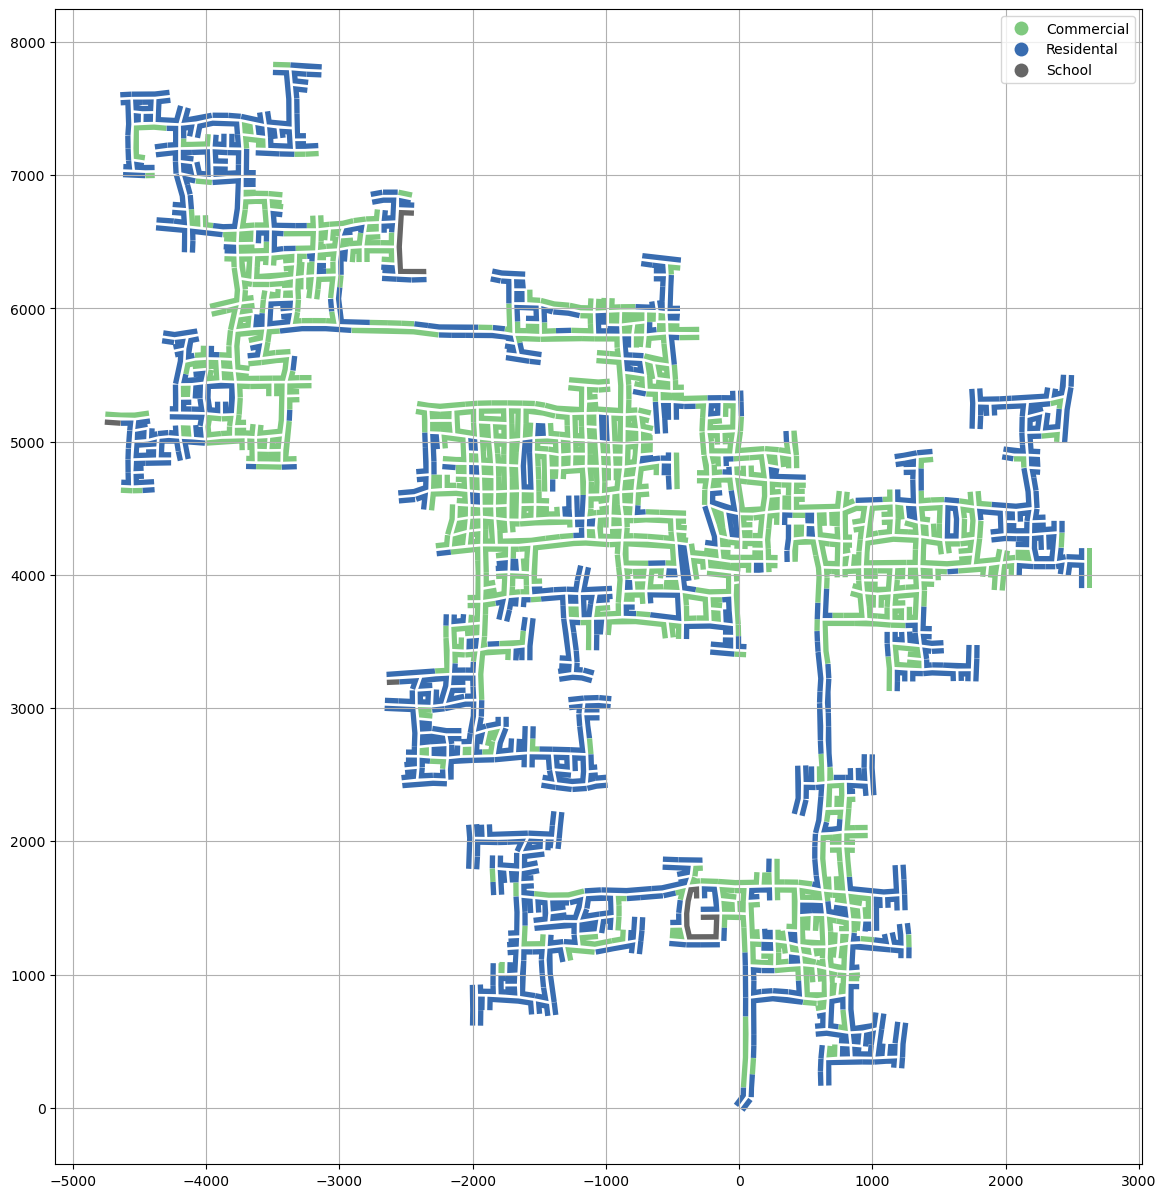

In [11]:
fig,ax = plt.subplots(1,1,figsize = (15,15))
# gdf_Commercial.plot(ax = ax, color = 'grey')
# gdf_Residential.plot(ax = ax, color = 'orange')
# gdf_School.plot(ax = ax, color = 'blue')
gdf.plot(column = 'buildingType',ax = ax,legend = True,colormap='Accent')
ax.grid()

# gdf.plot(ax = ax,color = 'orange')

In [12]:

# fig,ax = plt.subplots(1,1,figsize = (15,15))
var_topojson = Topology(gdf,prequantize=False).to_json()
var_topojson_apartments = Topology(gdf_apartments,prequantize=False).to_json()
# .topoquantize(1000).to_alt().properties(title='WITH Topoquantization',width = 1000,height = 1000)

In [13]:

data_topojson = alt.InlineData(values = var_topojson,format = alt.DataFormat(feature = 'data',type = 'topojson'))
data_topojson_apartment = alt.InlineData(values = var_topojson_apartments,format = alt.DataFormat(feature = 'data',type = 'topojson'))

In [14]:
alt.Chart(data_topojson).mark_geoshape(
).encode(
    color="properties.buildingType:N"
).project(
    type='identity', reflectY=True
).properties(
    height = 750,width = 750
)

alt.Chart(...)

In [15]:
background = alt.Chart(data_topojson).mark_geoshape(
         fill = 'white',
         stroke = 'black',
         strokeWidth = 1).project(
    type='identity', reflectY=True
).properties(
    height = 1000,width = 1000
)
points = alt.Chart(df_apartments).mark_circle(size = 80, fill = 'crimson').encode(longitude = 'x',latitude = 'y',tooltip='restaurantId').properties(
    height = 1000,width = 1000
)
text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7,
    fill = 'green',
    size=10
).encode(
    text='restaurantId'
)
# .encode(
#     color="properties.buildingType:N"
# )
background + points + text

alt.LayerChart(...)

In [20]:
df_apartments

,restaurantId,foodCost,maxOccupancy,location,buildingId,x,y
0,445,5.15,71,POINT (631.5130723031391 2001.4772026036535),304,631.513072,2001.477203
1,446,4.17,82,POINT (413.840000705876 1194.128694228948),308,413.840001,1194.128694
2,447,5.87,119,POINT (497.9967937001494 1624.515148185587),58,497.996794,1624.515148
3,448,4.07,98,POINT (698.2411158717262 4392.416668183332),964,698.241116,4392.416668
4,449,5.11,53,POINT (1407.7107695149243 4010.4574815269225),181,1407.710770,4010.457482
5,895,4.44,103,POINT (-1623.0740591441258 3872.0300113645017),164,-1623.074059,3872.030011
6,896,5.86,107,POINT (-2126.1723943111892 4285.182228265561),619,-2126.172394,4285.182228
7,897,5.76,104,POINT (-1989.63526350385 3368.764837974986),875,-1989.635264,3368.764838
8,898,4.22,115,POINT (-1771.452216635636 4343.580176583138),917,-1771.452217,4343.580177
9,899,5.65,85,POINT (-820.9290279479601 4497.243308530136),86,-820.929028,4497.243309
